<a href="https://colab.research.google.com/github/LeonelOctavio/Actividad2/blob/main/Tarea_fashion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Info

#    0 T-shirt/top
#    1 Trouser
#    2 Pullover
#    3 Dress
#    4 Coat
#    5 Sandal
#    6 Shirt
#    7 Sneaker
#    8 Bag
#    9 Ankle boot


In [65]:
# Extracción de datos MNIST
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from path"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape( len(labels), 784)
        images = ((images / 255.) - .5) * 2

    return images, labels

In [66]:
# Separación en conjuntos de entrenamiento y prueba
X_train, y_train = load_mnist('datasets/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('datasets/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


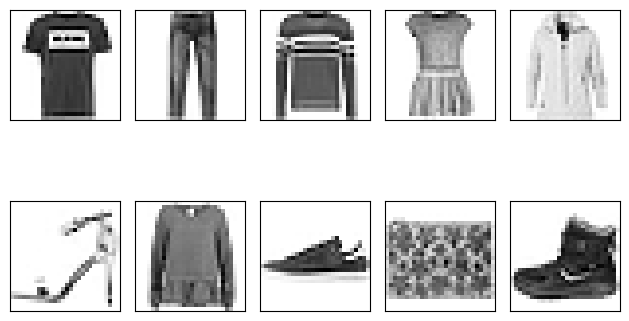

In [67]:
# Visualización del contenido
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey= True)

ax = ax.flatten()

for i in range(10):
    img = X_train[y_train == i][0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [163]:
# Creación de un directorio para almacenar datos
!mkdir savez_data

mkdir: cannot create directory ‘savez_data’: File exists


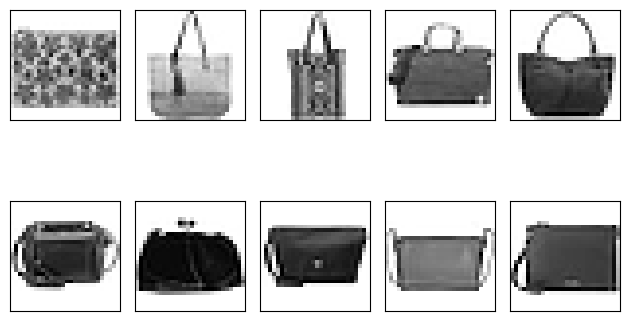

In [135]:
#Mostramos la secciòn de las bags 8
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
  img = X_train[y_train == 8][i].reshape(28,28)
  ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [70]:
# Almacenamiento de las variables de entrenamiento y prueba
from re import X
import numpy as np

np.savez_compressed('savez_data/mnist_scaled.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

In [71]:
# Listar contenido del directorio "savez_data"
!ls savez_data

mnist_scaled.npz


In [72]:
#Cargamos el archivo
mnist = np.load('savez_data/mnist_scaled.npz')

In [73]:
#Mostramos las variales
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [165]:
# Asignación del contenido de 'X_train' desde el objeto 'mnist' a 'X_train'
X_train = mnist['X_train']
X_train

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [75]:
# Extracción de variables 'X_train', 'y_train', 'X_test' y 'y_test' desde el objeto 'mnist'
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

In [129]:
# Creación de variables para categoría "bag" (bolso), donde 8 representa la categoría del 0 al 9 y_train_bag = (y_train == 8)
y_test_bag = (y_test == 8)

In [166]:
#Creamos un clasificador para la categoria bag 8
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=0.00001, random_state=42)
sgd_clf.fit(X_train, y_train_bag)

SGDClassifier(random_state=42, tol=1e-05)

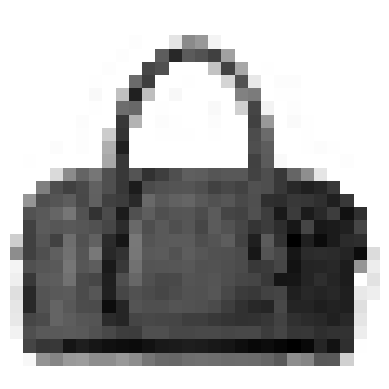

In [138]:
#Prueba 1 ver si es una bolsa
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[11000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [139]:
#Utilizamos el clasificador para saber si es bag 8
sgd_clf.predict([some_digit])

array([ True])

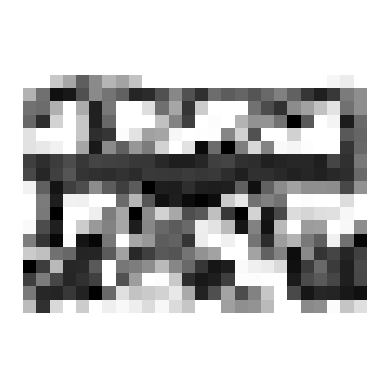

In [143]:
#Prueba 2: Categoria bag si es bolsa o no
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[10000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [144]:
#Utilizamos el clasificador para saber si es bag 8
sgd_clf.predict([some_digit])

array([ True])

In [145]:
#Calculamos cross_val_score con un cv=3
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_bag, cv=3, scoring='accuracy')

array([0.98375, 0.98375, 0.98565])

In [83]:
#Promedio de to
suma = (0.92405 + 0.92245 + 0.92685)/3
print(suma)

0.9244499999999999


In [146]:
#Calculamos cross_val_score con un cv=5
cross_val_score(sgd_clf, X_train, y_train_bag, cv=5, scoring='accuracy')

array([0.98608333, 0.98583333, 0.986     , 0.984     , 0.98375   ])

In [85]:
#Promedio de to
suma = (0.9195 + 0.925 + 0.92341667 + 0.91141667 + 0.923)/5
print(suma)

0.9204666679999999


In [86]:
from sklearn.base import BaseEstimator

class NeverShirtClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [147]:
# Creación de un clasificador que siempre predice Not bag
never_shirt_clf = NeverShirtClassifier()
cross_val_score(never_shirt_clf, X_train, y_train_bag, cv=3, scoring="accuracy")

array([0.90145, 0.89855, 0.9    ])

In [148]:
# Validación y almacenamiento de las predicciones en la variable 'y_train_pred'
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_bag, cv=3)

### Matrices de confusión

In [149]:
#Generamos una matriz de confusión
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train_bag, y_train_pred)
conf_matrix

array([[53684,   316],
       [  621,  5379]])

In [150]:
y_train_perfect_predition = y_train_bag
confusion_matrix(y_train_bag, y_train_perfect_predition)

array([[54000,     0],
       [    0,  6000]])

### Precission Score

In [151]:
# Cálculo de la métrica de precisión
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_bag, y_train_pred)

0.9445127304653205

In [92]:
#2nda forma de calcular la mètrica de precisiòn
conf_matrix[1, 1] / (conf_matrix[1, 1]+conf_matrix[0, 1])

0.7172046194847498

In [152]:
#mètrica de recuperaciòn
recall_score(y_train_bag, y_train_pred)

0.8965

In [94]:
#Otra forma de calcular la métrica de recuperación
conf_matrix[1, 1] / (conf_matrix[1, 1]+conf_matrix[1, 0])

0.4036666666666667

In [153]:
#Calculamos la puntuación F1
from sklearn.metrics import f1_score

f1_score(y_train_bag, y_train_pred)

0.919880290722531

In [96]:
#Otra forma de calcular la puntuación F1
conf_matrix[1, 1] / (conf_matrix[1, 1] + (conf_matrix[1, 0] + conf_matrix[0, 1])/2)

0.5165831289324944

In [97]:
#Calculamos los puntajes de decisión
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([1.49039396])

In [98]:
#Predecimos si el valor es clase + o -
threshold = 10000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [99]:
#Ejemplo secundario
threshold = 1
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [154]:
#Realizamos la validación cruzada y obtenemos puntajes
y_scores = cross_val_predict(sgd_clf, X_train, y_train_bag, cv=3, method="decision_function")

In [101]:
y_scores.shape

(60000,)

### Recall Curve

In [155]:
#Realizamos las curvas de precisión y recuperación
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_bag, y_scores)

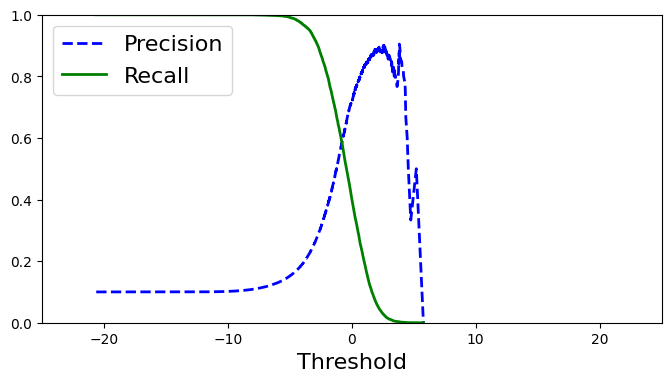

In [103]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-25, 25])
plt.show()

In [156]:
#Realizamos la curva ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_bag, y_scores)

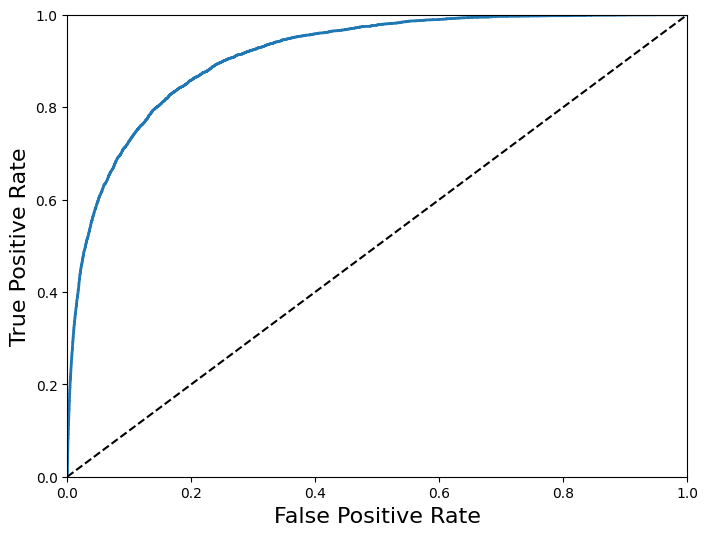

In [105]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
plt.show()

In [157]:
#Calculamos el área bajo la curva ROC (AUC-ROC)
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_bag, y_scores)

0.9891433734567899

### RandomForest

In [158]:
#Generamos un Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

#Obtenemos las probabilidades de predicción
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_bag, cv=3, method='predict_proba')

In [159]:
#Realizamos la curva ROC
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_bag, y_scores_forest)

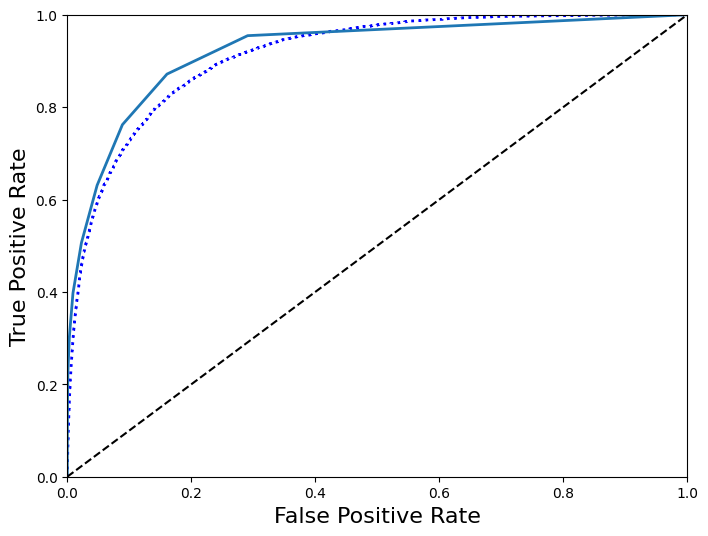

In [109]:
#Graficamos la curva ROC y la curva ROC del forest para ver la diferencia
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,"b:",linewidth=2,label="SGD")
plot_roc_curve(fpr_forest, tpr_forest)

In [160]:
#Calculmos el área bajo la curva ROC de forest
roc_auc_score(y_train_bag,y_scores_forest)

0.9933108564814814

In [161]:
#Obtenemos el valor de precisión del clasificador
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_bag,cv=3)
precision_score(y_train_bag,y_train_pred_forest)

0.9800315291644771

In [162]:
#Calculamos el valor de recuperación (recall) del clasificador
recall_score(y_train_bag, y_train_pred_forest)

0.9325

## Multi-Clasification

In [113]:
#Generamos un clasificador para entrenamiento
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=2000,tol=0.00001,random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(max_iter=2000, random_state=42, tol=1e-05)

In [114]:
#Clasificamos la categoria del valor de some_digit
some_digit = X_train[26000]
print(some_digit)
sgd_clf.predict([some_digit])

[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -0.09803922 -0.50588235 -0.83529412 -0.81960784 -0.71764706 -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -0.45098039  0.34117647 -0.1372549
 -0.68627451  0.58431373  0.34117647 -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.97647059 -0.60784314
  0.05882353  0.45882353 -0.17647059  0.01960784 -0.17647059  0.79607843
 -0.68627451 -0.91372549 -0.74117647 -0.95294118 -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -

array([6], dtype=uint8)

In [115]:
#Calculamos los puntajes de decisión para some_digit
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -0.91483177,  -5.47838862,  -3.85650393,  -2.81305357,
         -2.454349  , -10.7909938 ,   2.2141627 , -19.79548762,
         -5.41717187, -12.93289333]])

In [116]:
#Encontramos el índice del puntaje de decisión más alto en el array
np.argmax(some_digit_scores)

6

In [117]:
#Contiene una lista ordenada de las categorías a las que se refieren los puntajes de decisión
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [118]:
#Seleccionamos la categoría 6
sgd_clf.classes_[6]

6

In [119]:
#Entrenamos un clasificador multiclase
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=1000,tol=0.00001,random_state=42))
ovo_clf.fit(X_train,y_train)
#Predecimos la categoría para some_digit en el enfoque multiclase "One-vs-One".
ovo_clf.predict([some_digit])

array([6], dtype=uint8)

In [120]:
#Mostramos el número de clasificadores binarios
len(ovo_clf.estimators_)

45

In [121]:
#Entrenamos un clasificador RandomForestClassifier / predecimos la categoría de some_digit
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([6], dtype=uint8)

In [122]:
#Obtenemos las probabilidades de predicción estimadas por el clasificador
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [123]:
#Realizamos la validación cruzada y evaluamos el rendimiento de un clasificador SGDClassifier en términos de precisión (accuracy)
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.83895, 0.8463 , 0.84865])

In [63]:
#Realizamos una escalación de características utilizando StandardScaler y utilizamos la función cross_val_score para realizar validación cruzada y evaluar el rendimiento de un clasificador
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
#No se pudo evaluar ni con 10k de iteraciones

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8286 , 0.8339 , 0.83655])

## Análisis de Error

In [124]:
#Realizamos predicciones en los datos de entrenamiento escalados, y calculamos la matriz de confusión
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx
#Tampoco termino de calcular la matriz

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[4739,   18,   88,  429,   27,    1,  608,    0,   90,    0],
       [  15, 5677,   35,  207,   15,    1,   47,    0,    3,    0],
       [  42,    5, 4324,   84,  765,    0,  722,    0,   58,    0],
       [ 217,   98,   76, 5191,  191,    0,  214,    0,   13,    0],
       [   8,    5,  611,  317, 4434,    0,  603,    0,   22,    0],
       [   4,    2,    3,   11,    1, 5489,   19,  278,   73,  120],
       [ 806,   18,  633,  344,  533,    0, 3488,    1,  176,    1],
       [   0,    0,    0,    0,    0,  315,    0, 5419,   16,  250],
       [  31,    3,   28,  118,   31,   11,  143,   31, 5599,    5],
       [   0,    0,    0,    6,    2,  105,   10,  252,    4, 5621]])

In [125]:
#Definimos la funcion plot_confusion_matrix para crear un gráfico de matriz de confusión
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax=ax.matshow(matrix)
    fig.colorbar(cax)

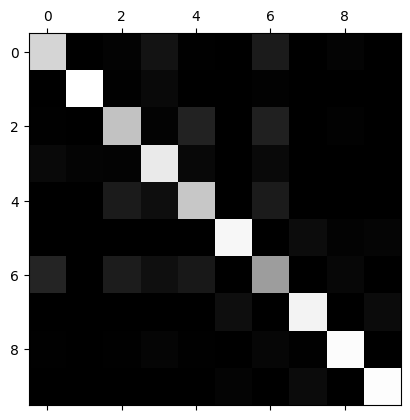

In [126]:
#Mostramos la matriz de confusión en escala de grises
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

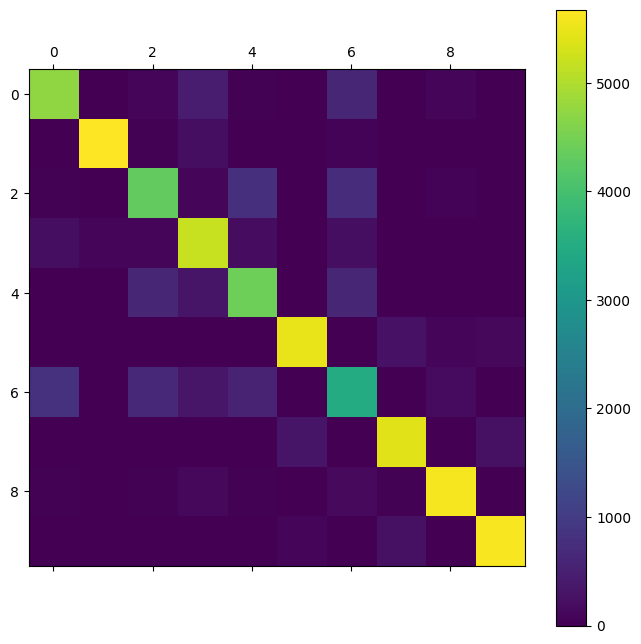

In [127]:
#Mostramos la matriz de confusión a color
plot_confusion_matrix(conf_mx)
plt.show()